In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
img_path = 'images/car.jpg'
img_path

'images/car.jpg'

In [42]:
img = plt.imread(img_path)
img.shape

(600, 1000, 3)

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [44]:
thresh = 128
binary = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]

In [59]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
# kernel = np.array([[0, 1, 1, 1, 0],
#                    [1, 0, 0, 0, 1],
#                    [1, 0, 0, 0, 1],
#                    [1, 0, 0, 0, 1],
#                    [0, 1, 1, 1, 0]], dtype='uint8')
kernel

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [60]:
erosion = cv2.erode(binary, kernel, iterations=1) 

In [61]:
dilation = cv2.dilate(binary, kernel, iterations=1) 

In [62]:
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

In [63]:
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

In [64]:
def plot_img(img_set, title_set):
    n = len(img_set)
    plt.figure(figsize = (20, 30))
    for i in range(n):
        img = img_set[i]
        ch = len(img.shape)

        plt.subplot(4, 2, i + 1)
        if (ch == 3):
            plt.imshow(img_set[i])
        else:
            plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i])
    plt.savefig('./Output.png')

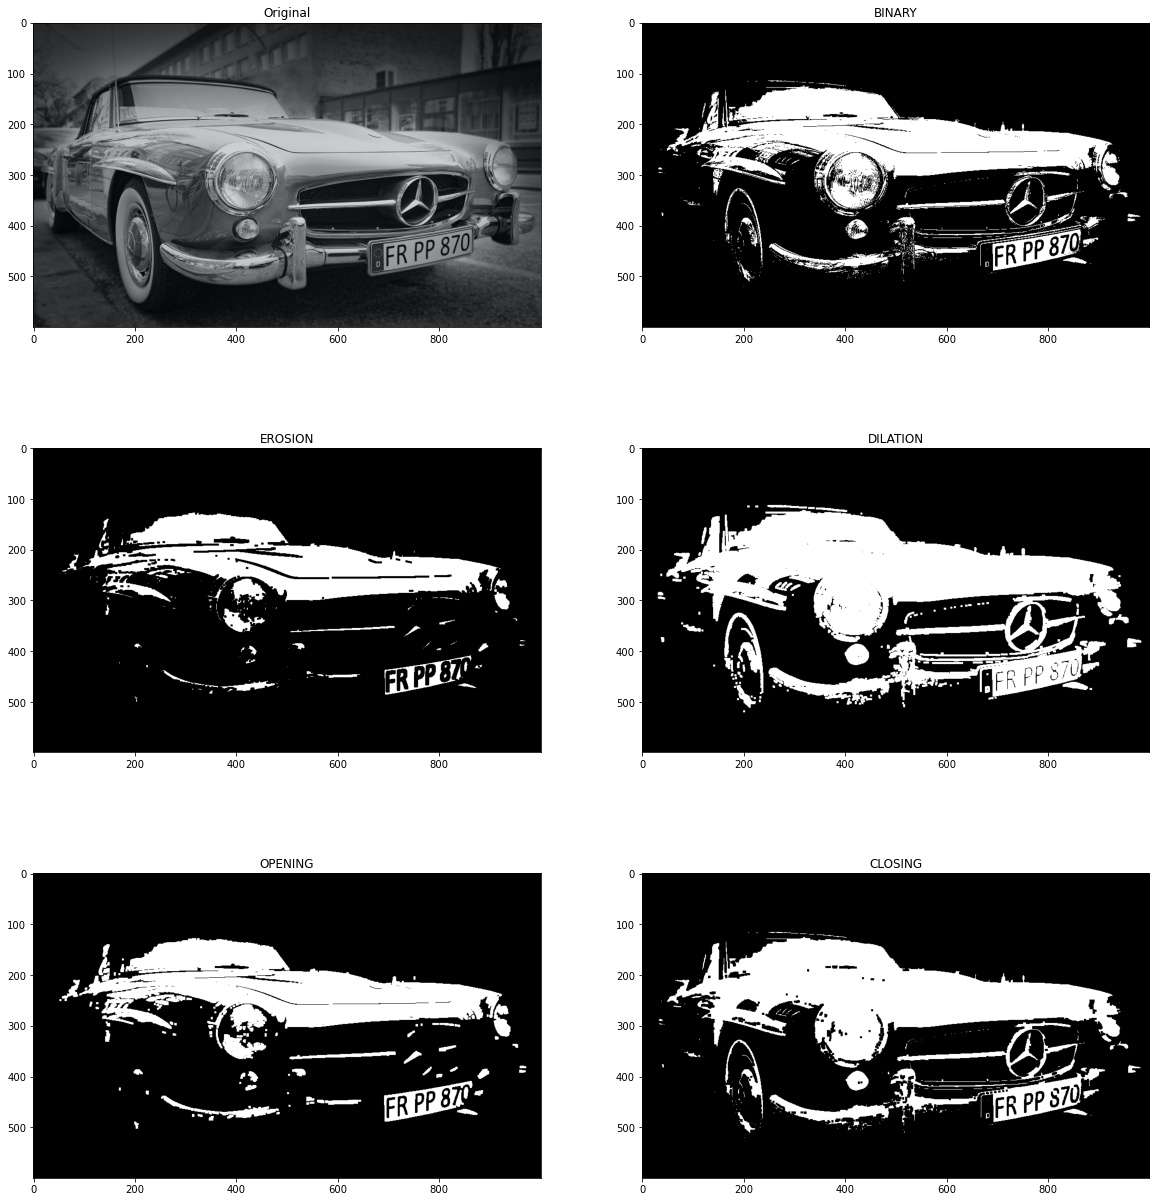

In [65]:
img_set = [img, binary, erosion, dilation, opening, closing]
title_set = ['Original', 'BINARY','EROSION', 'DILATION', 'OPENING', 'CLOSING']
plot_img(img_set, title_set)